In [4]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


In [23]:
#cleve_data <- read_csv("data/processed.cleveland.csv")
#hungary_data <- read_csv("data/processed.hungarian.csv")
#switz_data <- read_csv("data/processed.switzerland.csv")
van_data_csv <- read_csv("data/processed.van.csv", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                  filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

van_data <- van_data_csv %>%
             select(age, restecg, trestbps, chol)

van_data


Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, chest_pain, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,restecg,trestbps,chol
<dbl>,<dbl>,<chr>,<chr>
63,1,140,260
44,1,130,209
60,1,132,218
⋮,⋮,⋮,⋮
54,1,127,333
55,1,122,223
62,2,120,254


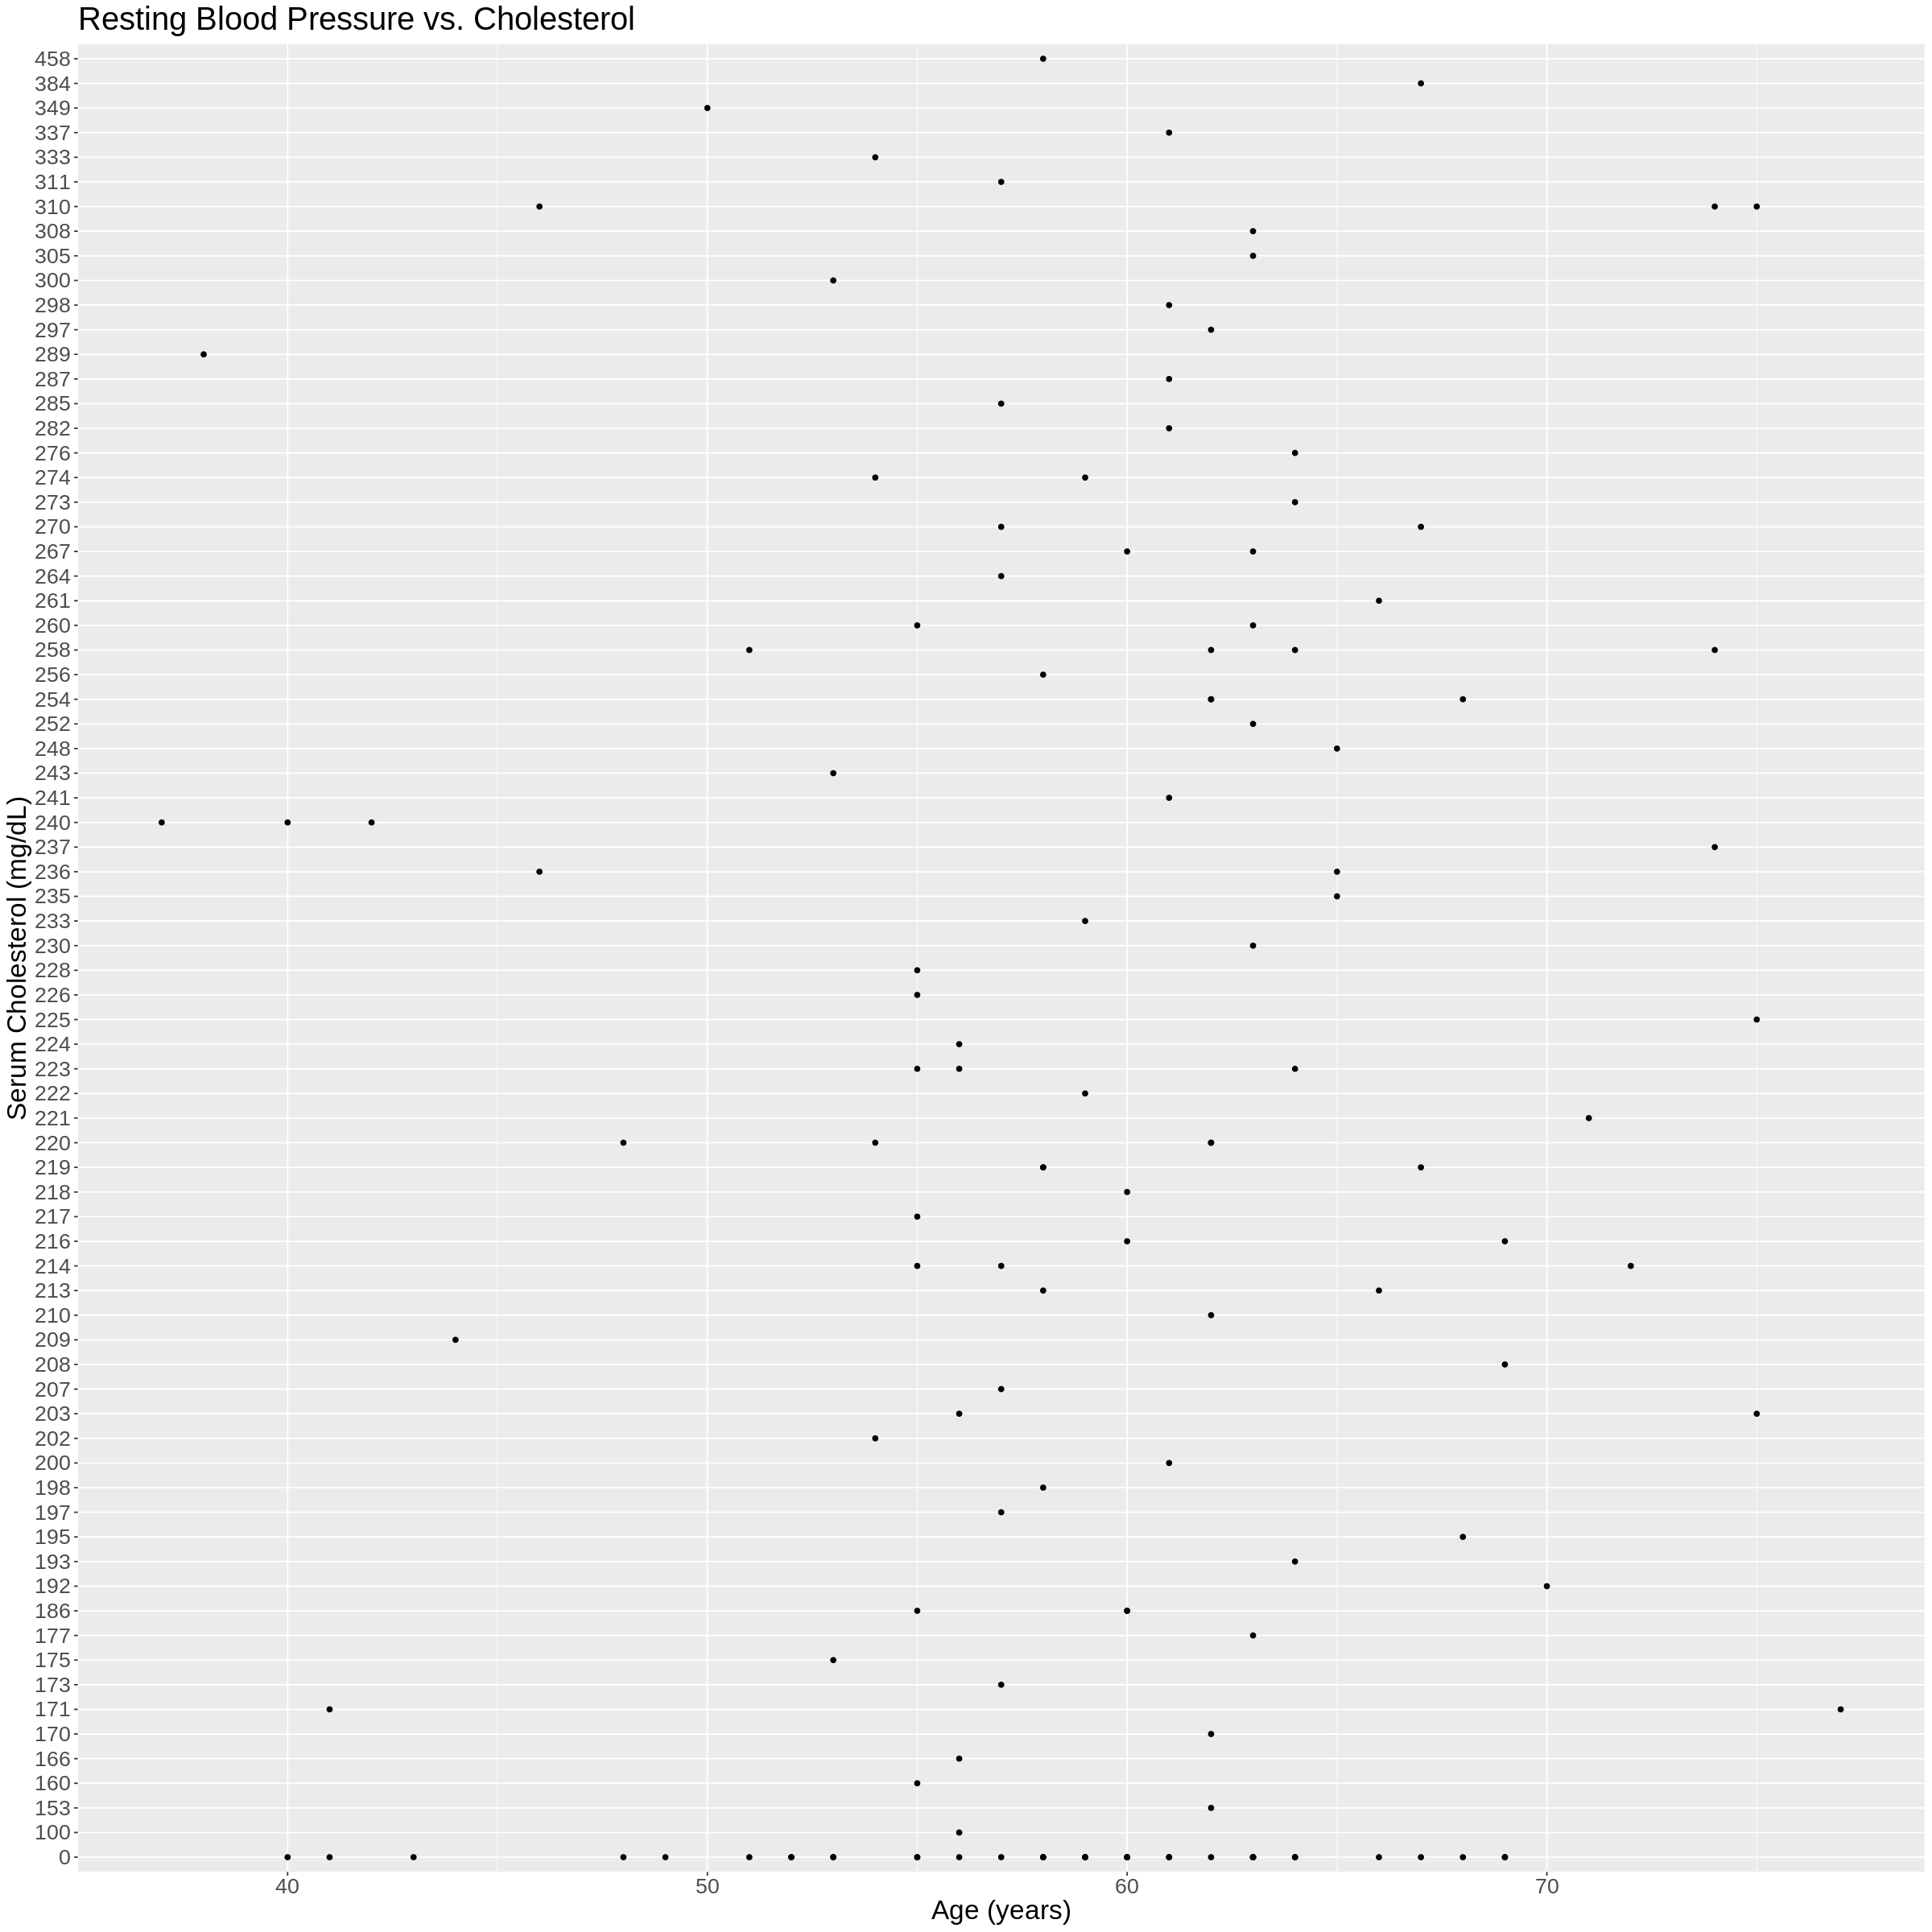

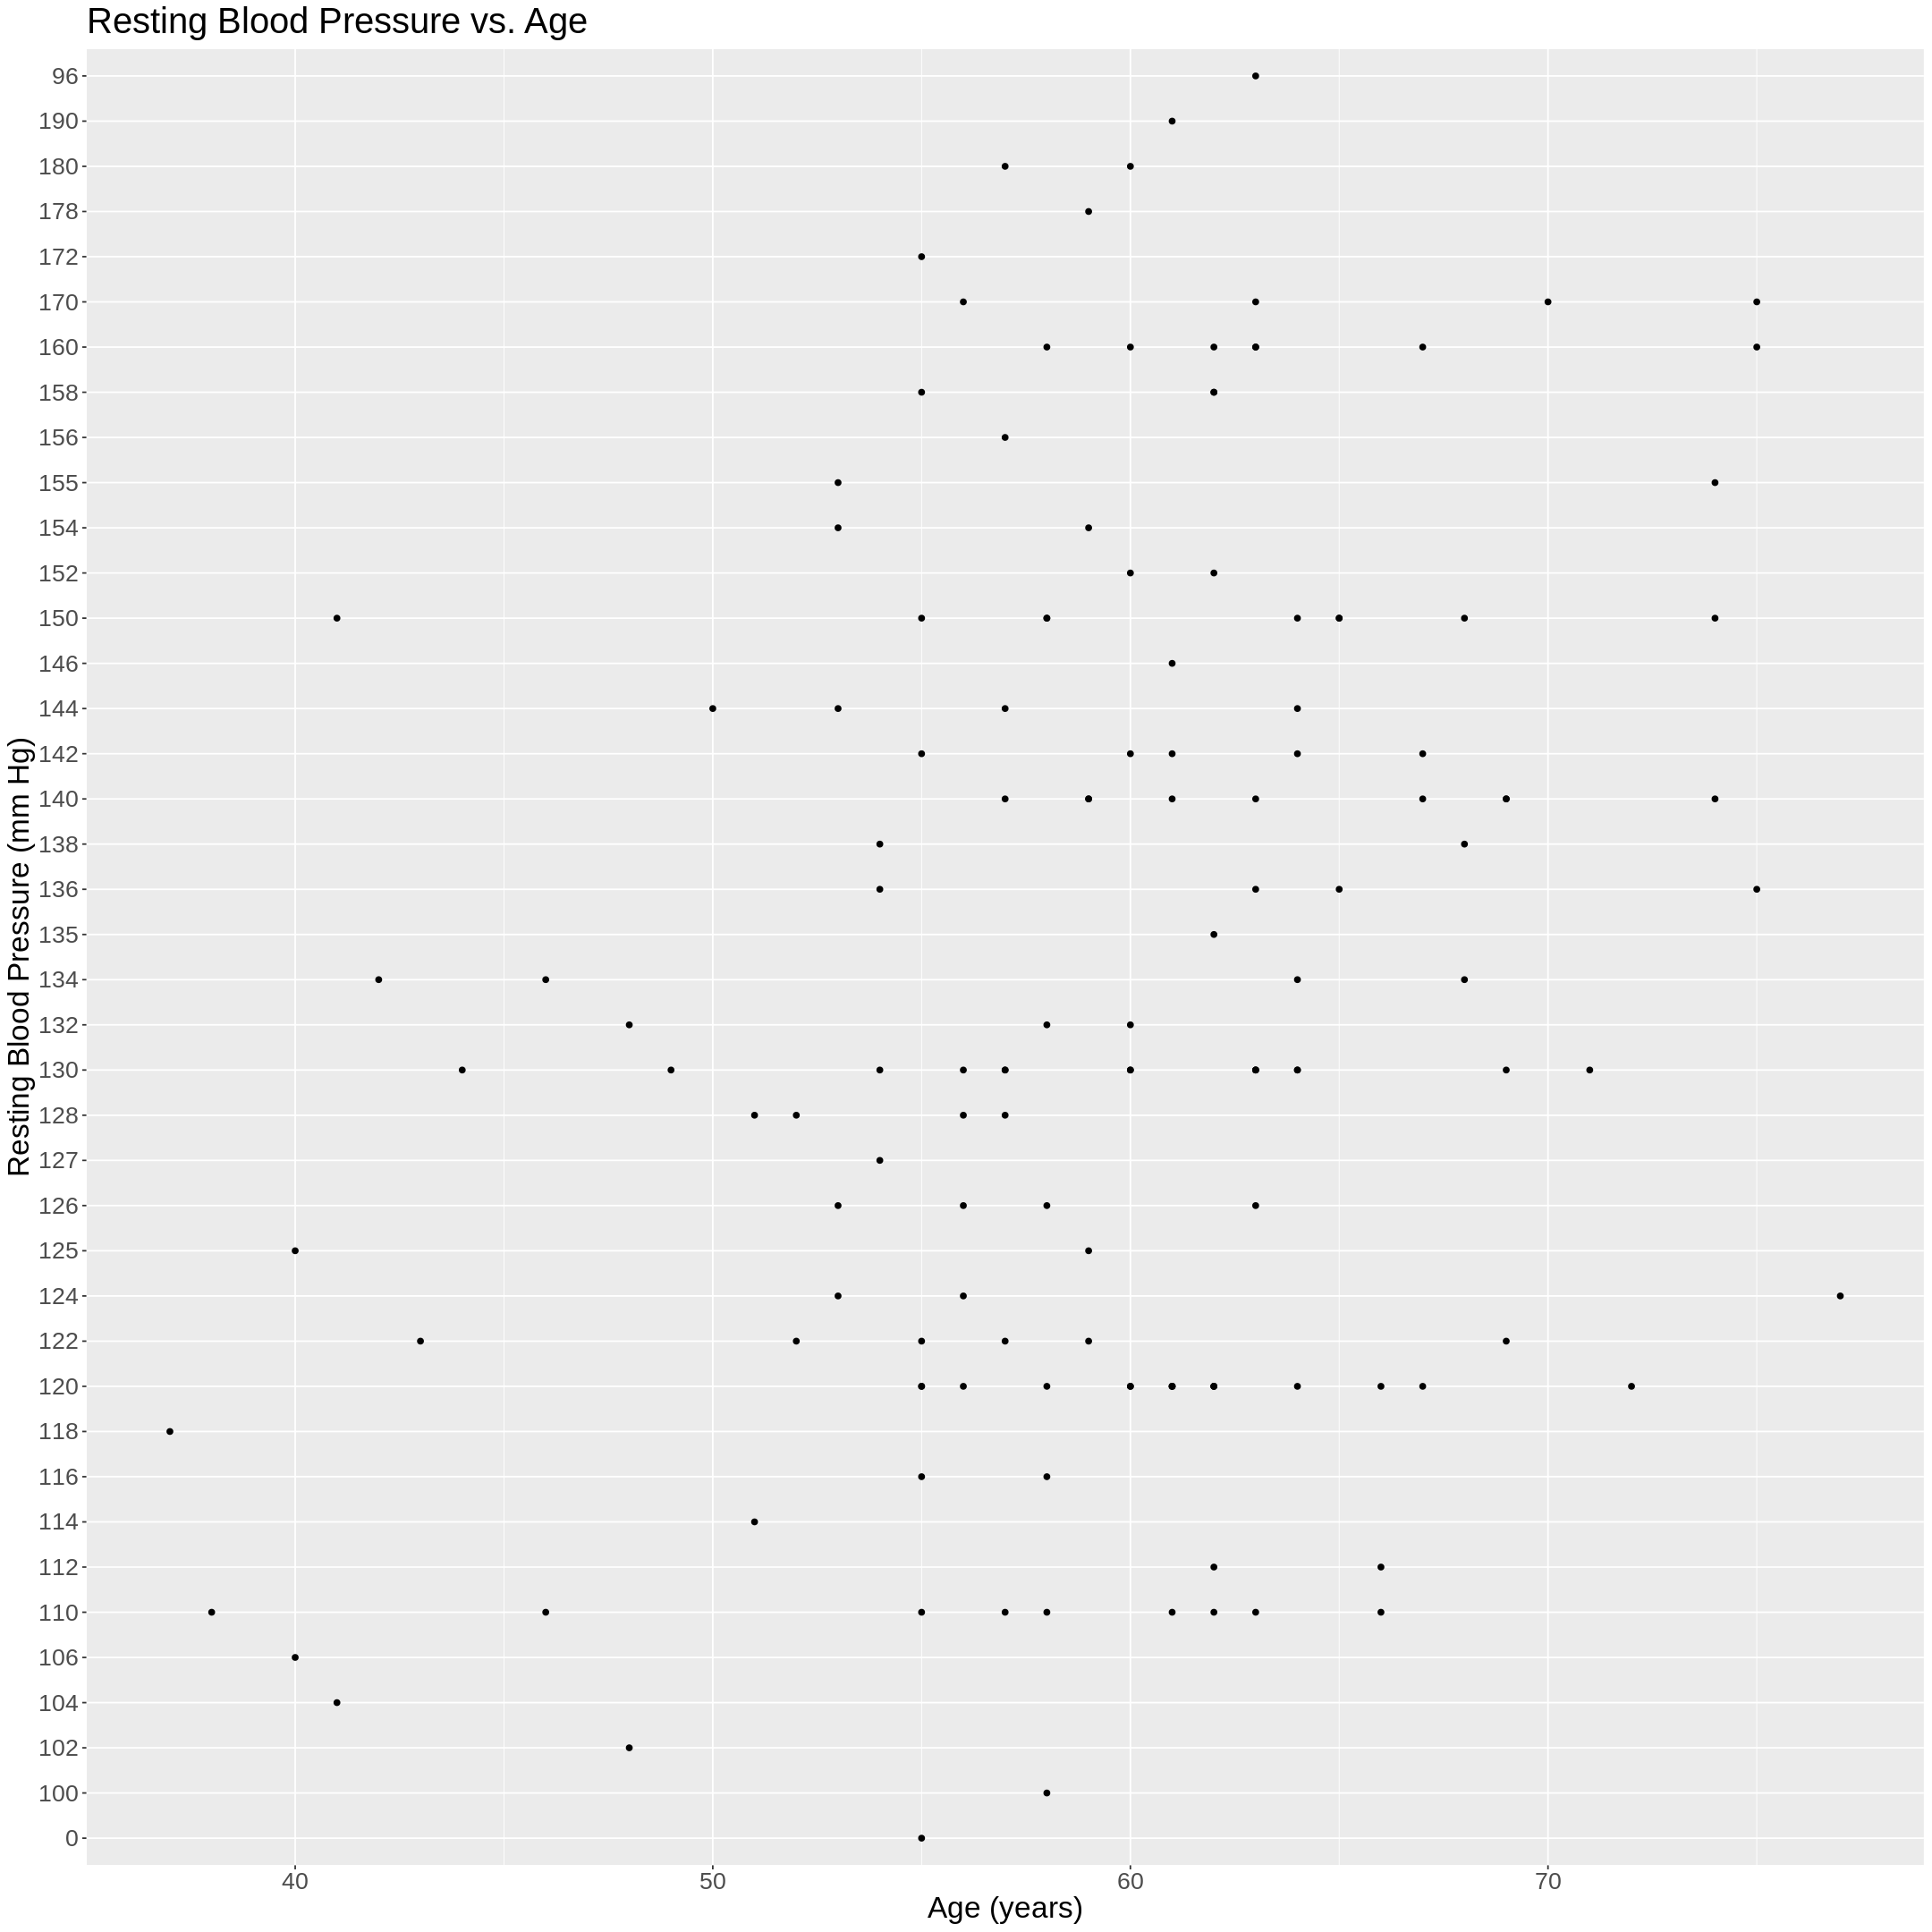

In [24]:
options(repr.plot.width = 20, repr.plot.height = 20) 

van_plot_chol <- ggplot(van_data, aes(x = age, y = chol)) + 
            geom_point() + 
            labs(x = "Age (years)", y = "Serum Cholesterol (mg/dL)", title = "Resting Blood Pressure vs. Cholesterol") + 
            theme( text = element_text(size = 20)) 
            
            
van_plot_chol       


options(repr.plot.width = 18, repr.plot.height = 18) 

van_plot_bps <- ggplot(van_data, aes(x = age, y = trestbps)) + 
            geom_point() + 
            labs(x = "Age (years)", y = "Resting Blood Pressure (mm Hg)", title = "Resting Blood Pressure vs. Age") + 
            theme( text = element_text(size = 20)) 
            
            
van_plot_bps 
                 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



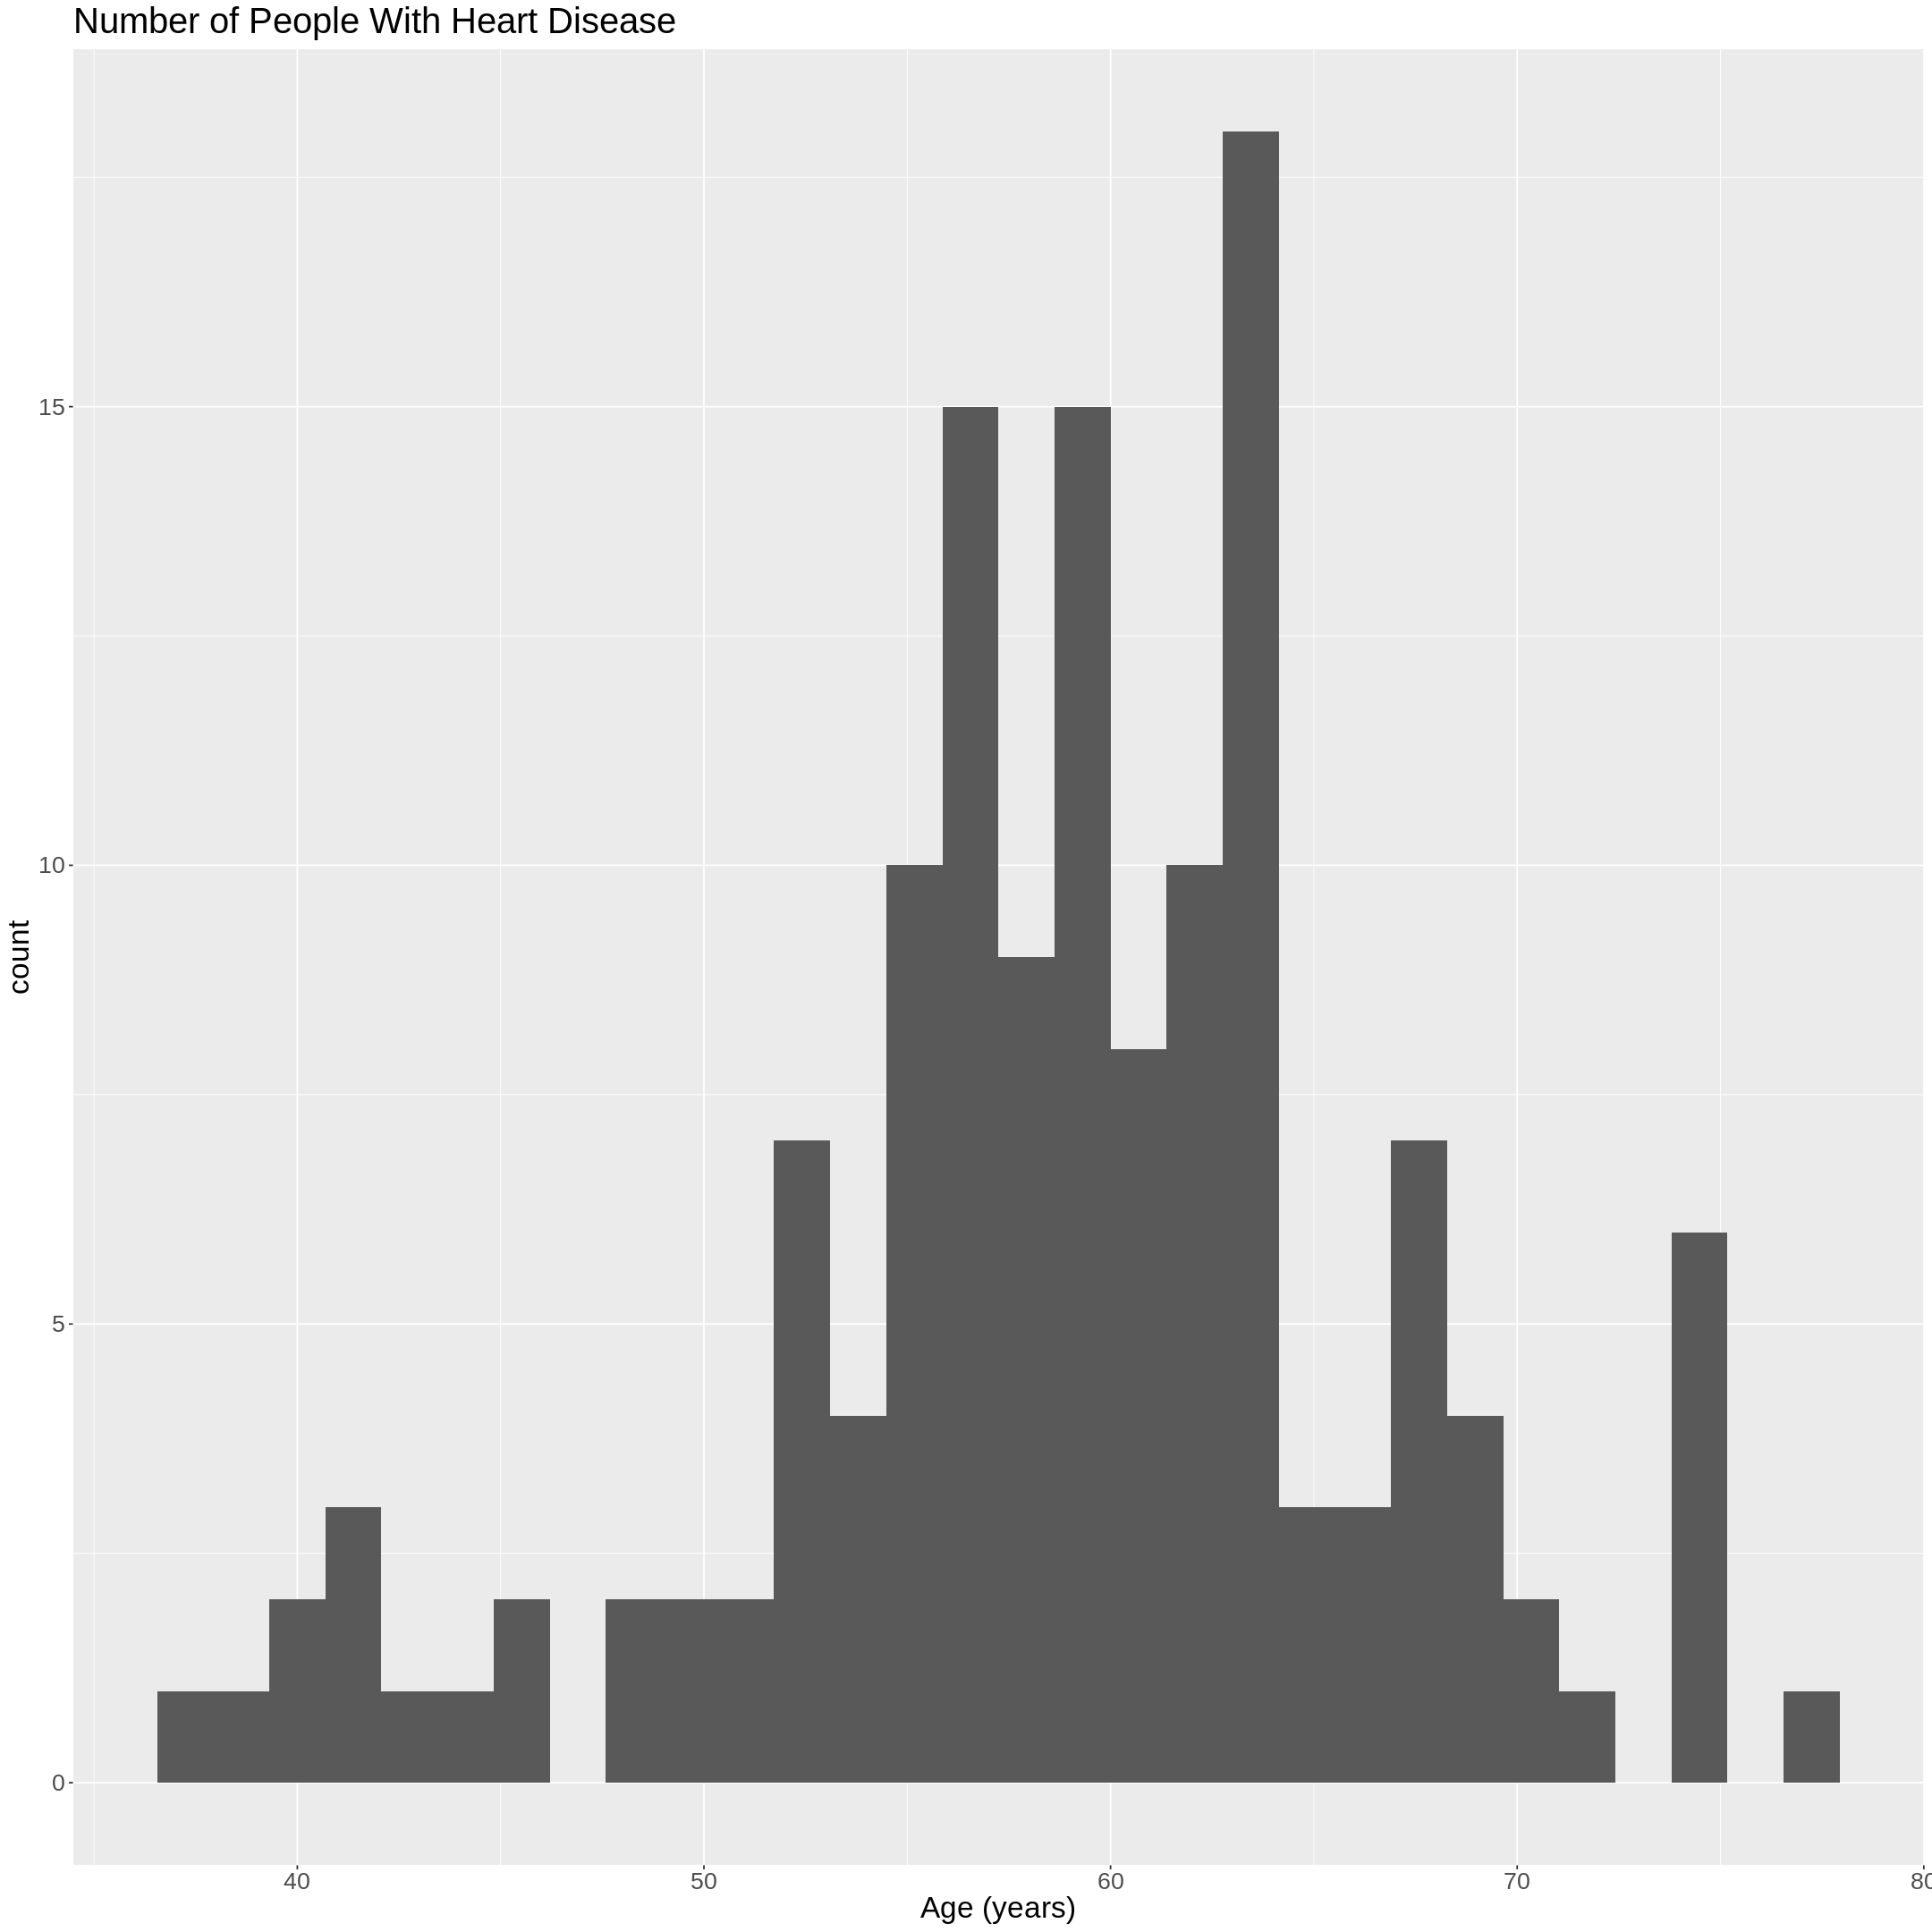

In [25]:
van_plot_hist <- ggplot(van_data, aes(x = age)) + 
            geom_histogram() + 
            labs(x = "Age (years)", title = "Number of People With Heart Disease") + 
            theme( text = element_text(size = 20)) 
van_plot_hist

In [26]:
# restecg, trestbps, chol

van_data <- van_data %>%
        mutate(age = as_factor(age)) %>%
        mutate(chol = as.numeric(chol)) %>%
        mutate(restecg = as.numeric(restecg)) %>%
        mutate(trestbps = as.numeric(trestbps))

van_data_scaled <- van_data# %>%  
       # mutate(scaled_trestbps = scale(trestbps, center = TRUE),
              # scaled_chol = scale(chol, center = TRUE))
print("van_data_scaled")
van_data_scaled

van_split <- initial_split(van_data, prop = 0.75 , strata = age)  
van_train <- training(van_split)   
van_test <- testing(van_split)

print("van_train")
van_train
print("van_test")
van_test

van_recipe <- recipe(age ~., data = van_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

print("van_recipe")
van_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
      set_engine("kknn") %>%
      set_mode("classification")

van_fit <- workflow() %>%
         add_recipe(van_recipe) %>%
         add_model(knn_spec) %>%
         fit(data = van_train)


[1] "van_data_scaled"


age,restecg,trestbps,chol
<fct>,<dbl>,<dbl>,<dbl>
63,1,140,260
44,1,130,209
60,1,132,218
⋮,⋮,⋮,⋮
54,1,127,333
55,1,122,223
62,2,120,254


Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


[1] "van_train"


age,restecg,trestbps,chol
<fct>,<dbl>,<dbl>,<dbl>
63,1,140,260
44,1,130,209
55,1,142,228
⋮,⋮,⋮,⋮
54,1,127,333
55,1,122,223
62,2,120,254


[1] "van_test"


age,restecg,trestbps,chol
<fct>,<dbl>,<dbl>,<dbl>
60,1,132,218
66,2,110,213
66,1,120,0
⋮,⋮,⋮,⋮
68,0,134,254
62,1,160,254
46,0,134,310


[1] "van_recipe"


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [27]:


van_test_predictions <- predict(van_fit, van_test) %>%
bind_cols(van_test)

print("van_test_predictions")
van_test_predictions


van_prediction_accuracy <- van_test_predictions |>
         metrics(truth = age, estimate = .pred_class)

print("van_prediction_accuracy")
van_prediction_accuracy

[1] "van_test_predictions"


.pred_class,age,restecg,trestbps,chol
<fct>,<fct>,<dbl>,<dbl>,<dbl>
48,60,1,132,218
57,66,2,110,213
55,66,1,120,0
⋮,⋮,⋮,⋮,⋮
65,68,0,134,254
58,62,1,160,254
64,46,0,134,310


[1] "van_prediction_accuracy"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.02857143
kap,multiclass,-0.00676819


In [28]:
<<<<<<< REMOTE CELL DELETED >>>>>>>


#knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
      #set_engine("kknn") %>%
      #set_mode("classification")

#age_recipe <- recipe(age ~ ., data = van_data_mutated) %>%
      #step_scale(all_predictors()) %>%
      #step_center(all_predictors())

#van_data_scaled <- age_recipe %>%  
                       #    prep() %>% 
                       #    bake(van_data_scaled)

#age_fit <- workflow() %>%
         #add_recipe(m_f_recipe) %>%
         #add_model(knn_spec) %>%
         #fit(data = van_data_mutated)
#age_fit



ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: <<
    ^
